In [1]:
from MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums

from MO_PPO_train_utils import load_saved_data
import itertools
from MORL_analysis_utils import generate_variable_name
from MORL_analysis_utils import plot_multiple_subplots
import itertools
import numpy as np

c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\Lib\site-packages\grid2op\Backend\pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\python.exe -m pip install numba

  warnings.warn(


In [2]:
num_episodes_list = [5]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results_5bus"
seeds = np.arange(0,10)

In [3]:
loaded_data = {}
do_nothing = True
# Loop through all combinations of num_episodes and weights
for num_episodes, weights, seed in itertools.product(num_episodes_list, weights_list, seeds):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params, donothing_reward_matrix, donothing_total_steps = load_saved_data(weights=weights, results_dir=results_dir, seed=seed, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights,seed=seed)
    actions_var_name = generate_variable_name("actions", num_episodes, weights,seed=seed)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights, seed=seed)
    if do_nothing == True:
        donothing_reward_var_name = generate_variable_name("donothing_reward_matrix", num_episodes, weights, seed=seed)
        donothing_total_steps_var_name = generate_variable_name("donothing_total_steps", num_episodes, weights, seed=seed)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps
    if do_nothing == True:
        loaded_data[donothing_reward_var_name] = donothing_reward_matrix
        loaded_data[donothing_total_steps_var_name] = donothing_total_steps

Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_0.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_0.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_0.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_0.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_0.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_1.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_1.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_1.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_1.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_1.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_2.npz
Loaded model

In [6]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_5_weights_1_0_0_seed_0', 'actions_episodes_5_weights_1_0_0_seed_0', 'total_steps_episodes_5_weights_1_0_0_seed_0', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_0', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_0', 'reward_matrix_episodes_5_weights_1_0_0_seed_1', 'actions_episodes_5_weights_1_0_0_seed_1', 'total_steps_episodes_5_weights_1_0_0_seed_1', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_1', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_1', 'reward_matrix_episodes_5_weights_1_0_0_seed_2', 'actions_episodes_5_weights_1_0_0_seed_2', 'total_steps_episodes_5_weights_1_0_0_seed_2', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_2', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_2', 'reward_matrix_episodes_5_weights_1_0_0_seed_3', 'actions_episodes_5_weights_1_0_0_seed_3', 'total_steps_episodes_5_weights_1_0_0_seed_3', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_3', 'donothing_total_steps_epi

In [7]:
def normalize_reward_matrix(reward_matrix,total_steps, EpisodeDur: bool=True):#EpisodeDuration: bool = True)
    
    normalized_reward_matrix = reward_matrix / total_steps[:, np.newaxis]
    if EpisodeDur==True: 
        normalized_reward_matrix[:,0] = reward_matrix[:,0]
    return normalized_reward_matrix

In [14]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_5_weights_1_0_0_seed_0', 'actions_episodes_5_weights_1_0_0_seed_0', 'total_steps_episodes_5_weights_1_0_0_seed_0', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_0', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_0', 'reward_matrix_episodes_5_weights_1_0_0_seed_1', 'actions_episodes_5_weights_1_0_0_seed_1', 'total_steps_episodes_5_weights_1_0_0_seed_1', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_1', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_1', 'reward_matrix_episodes_5_weights_1_0_0_seed_2', 'actions_episodes_5_weights_1_0_0_seed_2', 'total_steps_episodes_5_weights_1_0_0_seed_2', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_2', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_2', 'reward_matrix_episodes_5_weights_1_0_0_seed_3', 'actions_episodes_5_weights_1_0_0_seed_3', 'total_steps_episodes_5_weights_1_0_0_seed_3', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_3', 'donothing_total_steps_epi

In [21]:
loaded_data.keys()
num_seeds=10
seeds = np.arange(0,num_seeds)
reward_matrix_1_0_0 = []
for seed in seeds: 
    name = f"reward_matrix_episodes_5_weights_1_0_0_seed_{seed}"
    reward_matrix_1_0_0.append(loaded_data[name])
    

In [22]:
reward_matrix_1_0_0

[array([[ 1.48809524e-03,  1.29508537e+00,  1.00000000e-01],
        [ 4.46428571e-02,  4.18575042e+01,  8.69000000e+01],
        [ 9.92063492e-04,  0.00000000e+00, -2.00000000e+00],
        [ 0.00000000e+00,  3.80892852e+02,  6.67000000e+02],
        [ 0.00000000e+00,  2.29441072e+02,  3.86900000e+02]]),
 array([[ 0.00000000e+00,  4.96574079e+01,  8.93000000e+01],
        [ 0.00000000e+00,  3.45208131e+02,  6.89400000e+02],
        [ 0.00000000e+00,  1.50386199e+03,  2.01540000e+03],
        [ 1.48809524e-03,  6.42820150e-01, -1.50000000e+00],
        [ 1.93452381e-01,  2.29169549e+02,  3.86000000e+02]]),
 array([[0.00000000e+00, 1.57985348e+03, 2.01340000e+03],
        [4.41468254e-02, 4.11546961e+01, 8.69000000e+01],
        [0.00000000e+00, 1.48388070e+03, 2.01400000e+03],
        [1.48809524e-03, 1.24482838e+00, 8.00000000e-01],
        [0.00000000e+00, 5.99642732e+01, 9.36000000e+01]]),
 array([[ 2.48015873e-03,  5.87649822e-01, -3.50000000e+00],
        [ 3.40773810e-01,  3.4313

In [ ]:
normalized_reward_matrices = [normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_1_0_0'], loaded_data['total_steps_episodes_25_weights_1_0_0']),
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_0_1_0'], loaded_data['total_steps_episodes_25_weights_0_1_0']), 
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_0_0_1'], loaded_data['total_steps_episodes_25_weights_0_0_1']),
                normalize_reward_matrix(loaded_data["donothing_reward_matrix_episodes_25_weights_1_0_0"], loaded_data["donothing_total_steps_episodes_25_weights_1_0_0"])
]

In [ ]:
reward_matrices = [loaded_data['reward_matrix_episodes_25_weights_1_0_0'], loaded_data['reward_matrix_episodes_25_weights_0_1_0'], loaded_data['reward_matrix_episodes_25_weights_0_0_1'], loaded_data["donothing_reward_matrix_episodes_25_weights_1_0_0"] ]

In [ ]:
normalized_reward_matrices[3]

NameError: name 'normalized_reward_matrices' is not defined

settings for loading the files

In [24]:
string_values = [str(i) for i in range(0, 10)]

In [29]:
reward_matrix_1_0_0[0].sum()

1792.433637362813

In [37]:
reward_dim = 3
num_seeds = 10

In [54]:
def get_returns(reward_matrices, num_seeds, num_episodes, reward_dim):
    return_matrix = np.zeros((num_seeds, reward_dim))
    for seed in range(num_seeds): 
        return_matrix[seed] = reward_matrices[seed].sum(axis=0)
    print(return_matrix)    
    return return_matrix

In [55]:
return_matrix_100 = get_returns(reward_matrix_1_0_0, num_seeds, num_episodes, reward_dim)

[[4.71230159e-02 6.53486514e+02 1.13890000e+03]
 [1.94940476e-01 2.12853990e+03 3.17860000e+03]
 [4.56349206e-02 3.16609798e+03 4.20870000e+03]
 [3.44742063e-01 2.80956100e+03 3.74040000e+03]
 [5.70932540e-01 3.73403746e+03 5.17490000e+03]
 [1.98412698e-03 3.10765235e+03 4.54670000e+03]
 [3.02083333e-01 3.46770927e+03 4.63090000e+03]
 [1.94940476e-01 2.94708579e+03 4.47120000e+03]
 [6.91468254e-01 2.38008950e+03 3.39460000e+03]
 [9.92063492e-04 4.76005394e+03 6.49880000e+03]]


In [56]:
print(return_matrix_100)

[[4.71230159e-02 6.53486514e+02 1.13890000e+03]
 [1.94940476e-01 2.12853990e+03 3.17860000e+03]
 [4.56349206e-02 3.16609798e+03 4.20870000e+03]
 [3.44742063e-01 2.80956100e+03 3.74040000e+03]
 [5.70932540e-01 3.73403746e+03 5.17490000e+03]
 [1.98412698e-03 3.10765235e+03 4.54670000e+03]
 [3.02083333e-01 3.46770927e+03 4.63090000e+03]
 [1.94940476e-01 2.94708579e+03 4.47120000e+03]
 [6.91468254e-01 2.38008950e+03 3.39460000e+03]
 [9.92063492e-04 4.76005394e+03 6.49880000e+03]]


Input reward_matrix shape: (5, 3)
1.0555555555555554 1.7156701954105382 1.717339312406577
Input reward_matrix shape: (5, 3)
1.0076923076923077 1.4138495834360463 1.5797015221379347
Input reward_matrix shape: (5, 3)
1.0337078651685394 2.001682836226043 2.088565467911782
Input reward_matrix shape: (5, 3)
1.0116448326055312 1.6358567806977447 1.8608071304778409
Input reward_matrix shape: (5, 3)
1.596393897364771 2.3721826881215575 2.5683771297998113
Input reward_matrix shape: (5, 3)
1.0 1.9160782467078494 2.255988098189933
Input reward_matrix shape: (5, 3)
1.5695876288659791 2.0504642371983577 2.176632124352331
Input reward_matrix shape: (5, 3)
1.0076923076923077 2.1319192572301606 2.2167526796347756
Input reward_matrix shape: (5, 3)
1.073133179368745 1.546091551854868 1.6893728914467157
Input reward_matrix shape: (5, 3)
1.0 2.9542885672801784 3.2240515745102907


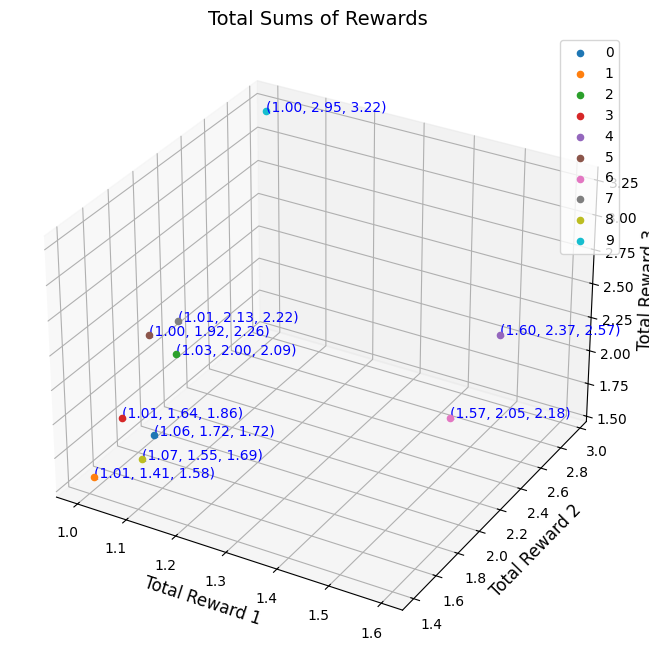

In [42]:
plot_total_sums(reward_matrices=reward_matrix_1_0_0, labels=string_values)

Input reward_matrix shape: (0,)


IndexError: tuple index out of range

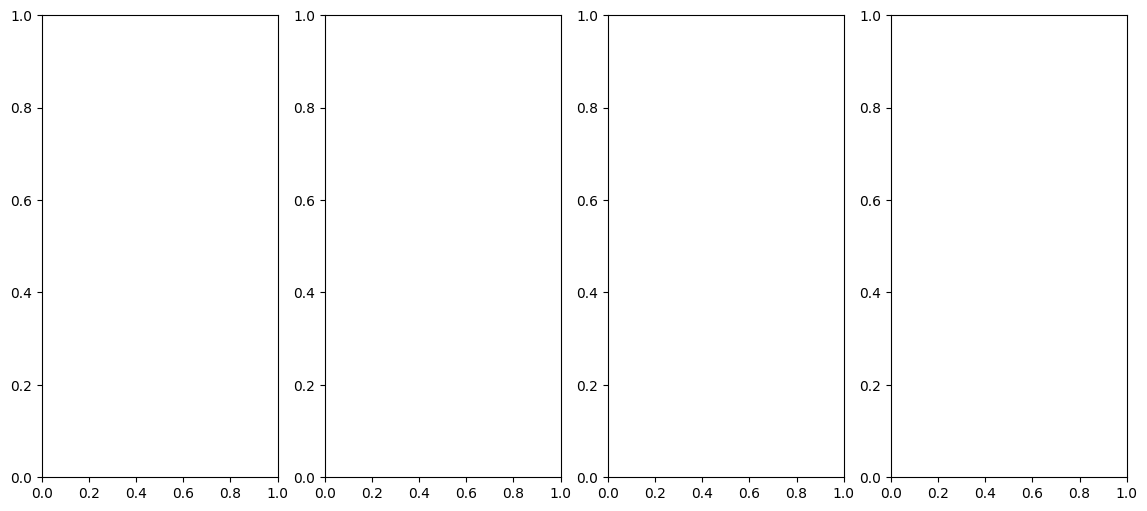

In [ ]:
plot_multiple_subplots(reward_matrices=reward_matrices, summed_episodes=200)

In [ ]:
import matplotlib.pyplot as plt

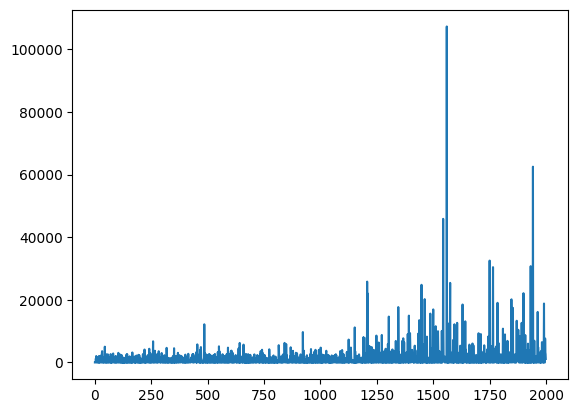

In [ ]:
plt.plot(total_steps)